In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
import numpy as np
import pandas as pd

# 6.1

In [ ]:
# Perceptron function
def perceptron(inputs, weights, bias, activate_func):
    return activate_func(np.dot(inputs, weights) + bias)
def activate_func(x):
    return 1 if x >= 0 else 0
#random weights and bias
weights_or = np.random.rand(2)
bias_or = np.random.rand()
weights_and = np.random.rand(2)
bias_and = np.random.rand()
lr = 0.1
n_iter = 100
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
# Train OR gate
for i in range(n_iter):
    for j in range(len(X_or)):
        y_pred = perceptron(X_or[j], weights_or, bias_or, activate_func)
        error = y_or[j] - y_pred
        weights_or += lr * error * X_or[j]
        bias_or += lr * error
# Train AND gate
for i in range(n_iter):
    for j in range(len(X_and)):
        y_pred = perceptron(X_and[j], weights_and, bias_and, activate_func)
        error = y_and[j] - y_pred
        weights_and += lr * error * X_and[j]
        bias_and += lr * error

# Test OR gate
inputs_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_or = [perceptron(x, weights_or, bias_or, activate_func) for x in inputs_or]
print("OR Gate: ", outputs_or)

# Test AND gate
inputs_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_and = [perceptron(x, weights_and, bias_and, activate_func) for x in inputs_and]
print("AND Gate: ", outputs_and)

OR Gate:  [0, 1, 1, 1]
AND Gate:  [0, 0, 0, 1]


 Training data for OR gate

 Training data for AND gate

OR Gate:  [0, 1, 1, 1]
AND Gate:  [0, 0, 0, 1]


# 6.2

In [ ]:
dataset = pd.read_csv("horseRacing.csv")

In [ ]:
df = dataset

In [ ]:
df

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.070,-1.96,-1.950,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.000,0.00,0.000,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.480,0.44,0.390,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.320,1.09,0.780,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.000,0.00,0.390,1.17,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98385,691981,1770390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11.0
98386,691981,1770391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,81.0
98387,719014,901847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.71,-0.71,0.740,0.71,0.770,0.71,1.0,3.1
98388,719014,904955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.71,0.71,-0.670,-0.71,-0.640,-0.71,2.0,7.0


In [ ]:
 df.dropna(inplace= True)

In [ ]:
def convert_label(label):
    if label == "Lost":
        return 0
    else:
        return 1

dataset["calc_position"] = dataset["calc_position"].apply(convert_label)

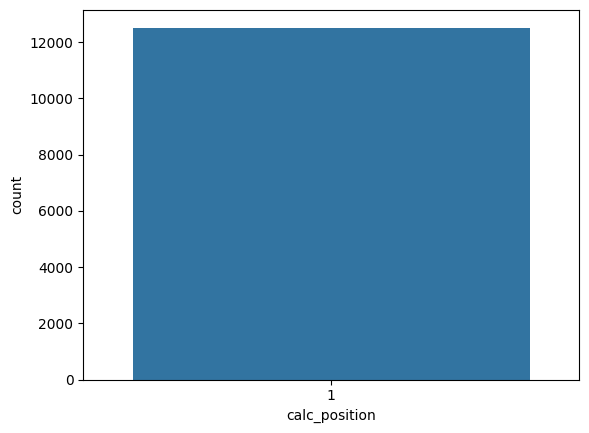

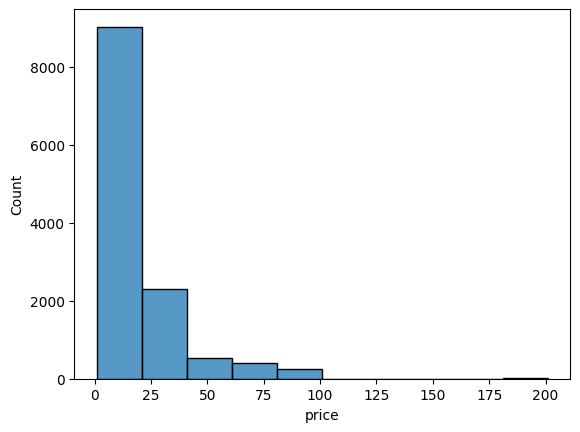

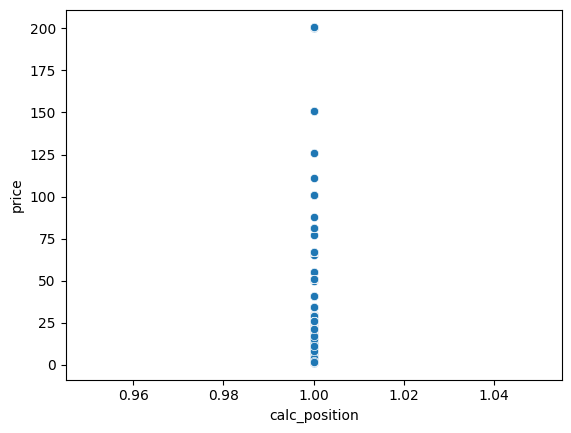

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="calc_position", data=dataset)
plt.show()

sns.histplot(data=dataset, x="price", bins=10)
plt.show()

sns.scatterplot(data=dataset, x="calc_position", y="price")
plt.show()

There is a problem with the dataset in that the Race ID and Horse ID columns are not unique. We can solve this by using one-hot encoding to convert these columns into separate columns for each possible value.

In [ ]:
df.columns

Index(['horse_id', '1-101', '1-102', '1-103', '1-104', '1-105', '1-106',
       '1-107', '1-108', '1-109',
       ...
       'race_id_690404', 'race_id_690527', 'race_id_690929', 'race_id_690963',
       'race_id_690972', 'race_id_691197', 'race_id_691329', 'race_id_691331',
       'race_id_691338', 'race_id_691538'],
      dtype='object', length=1085)

In [ ]:
df = pd.get_dummies(df, columns=["race_id"])

In [ ]:
df = pd.get_dummies(df, columns=["horse_id"])

In [ ]:
df

,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,1-109,1-110,...,horse_id_1596237,horse_id_1616149,horse_id_1625924,horse_id_1643731,horse_id_1654282,horse_id_1681719,horse_id_1683453,horse_id_1738464,horse_id_1738480,horse_id_1757340
278,1.10,0.52,0.45,0.35,0.27,1.62,2.23,0.06,0.22,0.49,...,0,0,0,0,0,0,0,0,0,0
279,0.47,0.41,-0.54,0.94,0.78,0.28,-0.17,0.94,-1.17,-1.06,...,0,0,0,0,0,0,0,0,0,0
280,-0.62,-1.20,-0.64,0.04,-0.27,-0.13,-0.80,-0.81,-0.18,-0.28,...,0,0,0,0,0,0,0,0,0,0
281,-0.55,-1.19,-1.23,-1.21,-1.09,-1.49,-1.13,-1.60,0.61,1.27,...,0,0,0,0,0,0,0,0,0,0
282,-0.87,-0.88,-0.75,-0.04,-0.32,-0.22,-0.75,0.59,0.61,0.11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98326,-0.51,-0.59,-0.48,-0.55,-0.73,-0.44,-0.27,-1.02,1.58,1.63,...,0,0,0,0,0,0,0,0,0,0
98327,1.72,1.38,1.54,0.29,1.42,0.12,0.89,0.54,-0.63,-0.82,...,0,0,0,0,0,0,0,0,0,0
98328,-0.61,-0.81,-0.85,-0.67,-0.71,-0.69,-0.91,-0.69,-0.32,-0.82,...,0,0,0,0,0,0,0,0,0,0
98329,-0.64,-0.73,-0.68,-0.71,-0.68,-0.68,-0.91,-0.28,0.32,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#the class labels based on price ranges
price_thresholds = [10, 20, 30]
labels = np.digitize(df['price'], price_thresholds)

In [ ]:
X = df.drop(['price'], axis=1)
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)
classifier.fit(X_train_scaled, y_train)

In [ ]:
accuracy = classifier.score(X_test_scaled, y_test)

In [ ]:
print(accuracy)

0.42931309904153353
